In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [2]:
infla = pd.read_csv('https://www.quandl.com/api/v3/datasets/ODA/BRA_PCPIPCH.csv?api_key=KL6MAyNseA2phjbrvTzS',index_col='Date',parse_dates=True)

In [3]:
infla.head()

,Value
Date,
2024-12-31,3.969
2023-12-31,3.968
2022-12-31,3.968
2021-12-31,3.305
2020-12-31,3.555


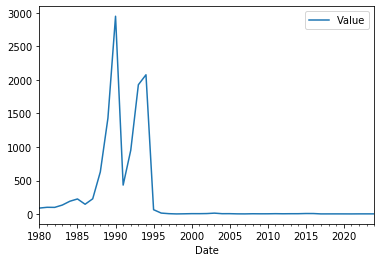

In [4]:
infla.plot()

In [5]:
idx1 = infla.loc['2018-12-31':'2000-12-31'].index

In [6]:
idx1

DatetimeIndex(['2018-12-31', '2017-12-31', '2016-12-31', '2015-12-31',
               '2014-12-31', '2013-12-31', '2012-12-31', '2011-12-31',
               '2010-12-31', '2009-12-31', '2008-12-31', '2007-12-31',
               '2006-12-31', '2005-12-31', '2004-12-31', '2003-12-31',
               '2002-12-31', '2001-12-31', '2000-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [7]:
juros = pd.read_csv('https://www.quandl.com/api/v3/datasets/WWDI/BRA_FR_INR_DPST.csv?api_key=KL6MAyNseA2phjbrvTzS',index_col='Date',parse_dates=True)

In [8]:
juros.head()

,Value
Date,
2018-12-31,6.872159
2017-12-31,8.513533
2016-12-31,12.445764
2015-12-31,12.622459
2014-12-31,10.023635


In [9]:
idx2 = juros.loc['2018-12-31':'2000-12-31'].index

In [10]:
idx2

DatetimeIndex(['2018-12-31', '2017-12-31', '2016-12-31', '2015-12-31',
               '2014-12-31', '2013-12-31', '2012-12-31', '2011-12-31',
               '2010-12-31', '2009-12-31', '2008-12-31', '2007-12-31',
               '2006-12-31', '2005-12-31', '2004-12-31', '2003-12-31',
               '2002-12-31', '2001-12-31', '2000-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [11]:
datainfla = infla.loc['2018-12-31':'2000-12-31']['Value']

In [12]:
datajuros = juros.loc['2018-12-31':'2000-12-31']['Value']

In [13]:
investment = pd.read_csv('https://www.quandl.com/api/v3/datasets/WWDI/BRA_BX_KLT_DINV_WD_GD_ZS.csv?api_key=KL6MAyNseA2phjbrvTzS',index_col='Date',parse_dates=True)

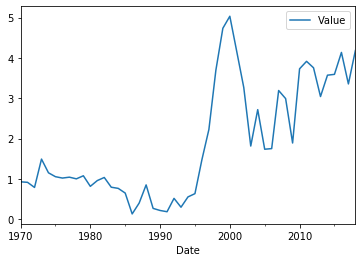

In [14]:
investment.plot()

In [15]:
idx3 = investment.loc['2018-12-31':'2000-12-31'].index

In [16]:
datainv = investment.loc['2018-12-31':'2000-12-31']['Value']

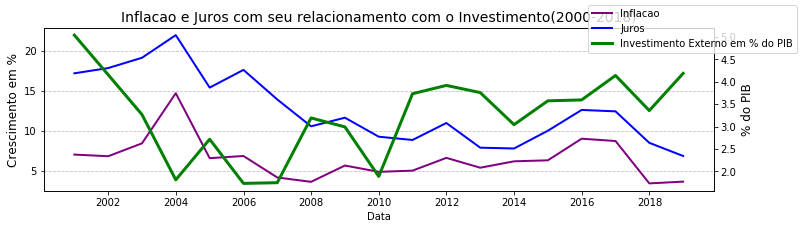

In [17]:
inflaxjurosxinv, ax = plt.subplots(figsize=(12,3))

ax.plot(idx1,datainfla,color='purple',label='Inflacao',lw=2)
ax.plot(idx2,datajuros, 'b',label='Juros',lw=2)
ax.set_xlabel('Data',fontsize=10)
ax.set_ylabel('Crescimento em %',fontsize=12)
ax.yaxis.grid(True,alpha=0.8,linestyle='dashed')
ax.set_title('Inflacao e Juros com seu relacionamento com o Investimento(2000-2018)',fontsize=14)

ax2 = ax.twinx()
ax2.plot(idx3,datainv,'g',label='Investimento Externo em % do PIB',lw=3)
ax2.set_ylabel('% do PIB',fontsize=12)

inflaxjurosxinv.legend()
plt.show()

In [18]:
inflaxjurosxinv.savefig('inflaxjurosxinv.png')

In [19]:
from pandas.plotting import scatter_matrix

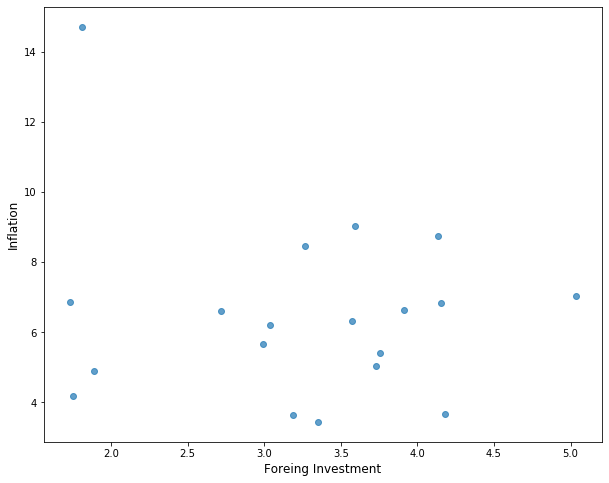

In [20]:
ixj, ax3 = plt.subplots(figsize=(10,8))

ax3.scatter(datainv,datainfla,alpha=0.7)
ax3.set_ylabel('Inflation',size=12)
ax3.set_xlabel('Foreing Investment',size=12)

plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

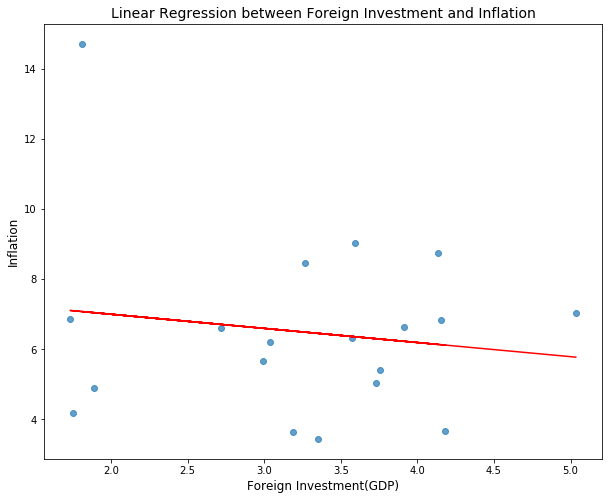

In [23]:
newinv = datainv.values.reshape(-1, 1)
newinfla = datainfla.values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(newinv, newinfla)
infla_pred = linear_regressor.predict(newinv)

reginflainv, ax4 = plt.subplots(figsize=(10,8))

ax4.set_xlabel('Foreign Investment(GDP)',size=12)
ax4.set_ylabel('Inflation',size=12)
ax4.set_title('Linear Regression between Foreign Investment and Inflation',size=14)

plt.scatter(newinv, newinfla,alpha=0.7)
plt.plot(newinv, infla_pred, color='red')


plt.show()

In [24]:
from scipy.stats import pearsonr

In [26]:
correlation, _= pearsonr(datainv, datainfla)
print('The correlation between the price of the foreign investment and the inflation is:',(correlation*100),'%')

The correlation between the price of the foreign investment and the inflation is: -14.531867464802406 %


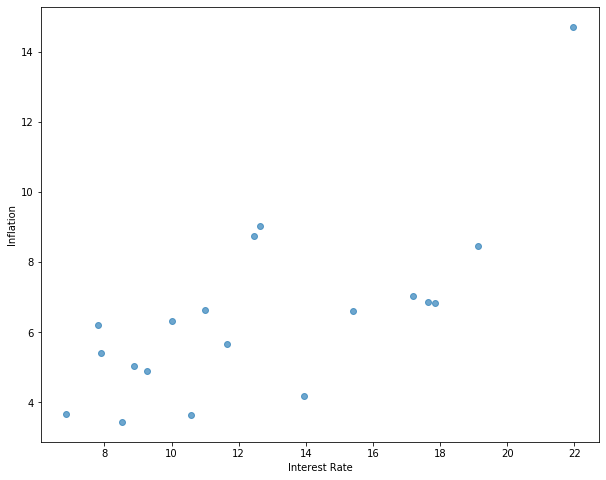

In [29]:
jurosxinf, ax5 = plt.subplots(figsize=(10,8))

ax5.scatter(datajuros,datainfla,alpha=0.65)
ax5.set_xlabel('Interest Rate')
ax5.set_ylabel('Inflation')

plt.show()

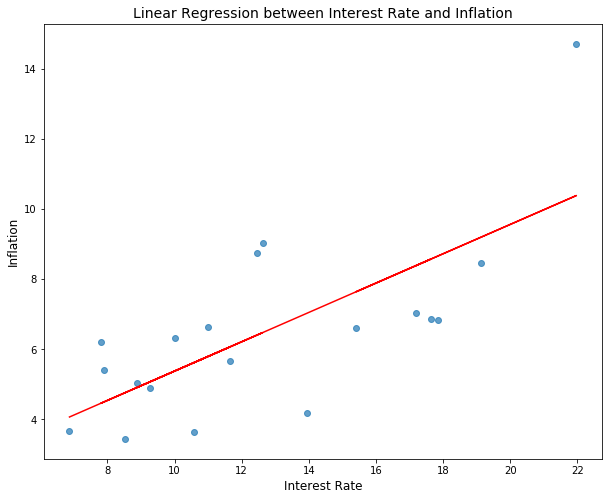

In [31]:
newjuros = datajuros.values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(newjuros, newinfla)
infla_pred1 = linear_regressor.predict(newjuros)

reginflajuros, ax6 = plt.subplots(figsize=(10,8))

ax6.set_xlabel('Interest Rate',size=12)
ax6.set_ylabel('Inflation',size=12)
ax6.set_title('Linear Regression between Interest Rate and Inflation',size=14)

plt.scatter(newjuros, newinfla,alpha=0.7)
plt.plot(newjuros, infla_pred1, color='red')


plt.show()

In [32]:
correlation1, _= pearsonr(datajuros, datainfla)
print('The correlation between the price of the foreign interest rate and the inflation is:',(correlation1*100),'%')

The correlation between the price of the foreign interest rate and the inflation is: 71.01278862591589 %
